In [4]:
%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [81]:
fname = "markers.td"
# Read all frames from 'markers.td'.
frames = np.loadtxt(fname, skiprows=1, usecols=range(1,49))

In [82]:
print(frames)

[[  0.7986  59.4959   5.4105 ...,   4.0318   5.2972   0.5658]
 [  0.7704  59.4979   5.3887 ...,   4.0322   5.2155   0.5308]
 [  0.7514  59.4979   5.3779 ...,   4.0383   5.1358   0.5046]
 ..., 
 [ -4.3339  55.5245  21.779  ...,  57.0201  17.769    5.246 ]
 [ -0.6874  57.3425  17.4693 ...,  28.442   15.5185  -0.7933]
 [  1.6422  58.3416  13.8355 ...,   8.3748  11.1844  -2.5345]]


In [83]:
frames.shape

(669, 48)

In [109]:
# Reshape the frames so that the type each element will transform to vector.
coords = frames.reshape((669*48//3, 3))

In [110]:
print(coords)

[[  7.98600000e-01   5.94959000e+01   5.41050000e+00]
 [  3.35730000e+00  -2.85340000e+00   7.90800000e-01]
 [ -1.00000000e-04   2.54075000e+01   3.12240000e+00]
 ..., 
 [  2.33184000e+01  -7.78370000e+00   8.70070000e+00]
 [  8.55860000e+00  -6.24875000e+01   2.82040000e+01]
 [  8.37480000e+00   1.11844000e+01  -2.53450000e+00]]


In [111]:
coords.shape

(10704, 3)

In [112]:
# Get the translation vector and rotation vector respectively.
translates = coords[0::2]
rotates = coords[1::2]

In [113]:
print(translates.shape)
print(rotates.shape)

(5352, 3)
(5352, 3)


In [114]:
translates

array([[  7.98600000e-01,   5.94959000e+01,   5.41050000e+00],
       [ -1.00000000e-04,   2.54075000e+01,   3.12240000e+00],
       [ -1.16899000e+01,   4.23944000e+01,   2.29640000e+00],
       ..., 
       [  1.97701000e+01,   7.59480000e+00,  -1.92509000e+01],
       [ -9.63330000e+00,  -8.55675000e+01,  -1.76442000e+01],
       [  8.55860000e+00,  -6.24875000e+01,   2.82040000e+01]])

In [115]:
rotates

array([[  3.35730000e+00,  -2.85340000e+00,   7.90800000e-01],
       [  6.62170000e+00,  -1.10490000e+00,  -1.37420000e+00],
       [ -2.19070000e+00,  -1.05357000e+01,   8.12297000e+01],
       ..., 
       [ -1.91507960e+03,  -1.87685000e+02,   1.87048490e+03],
       [  2.33184000e+01,  -7.78370000e+00,   8.70070000e+00],
       [  8.37480000e+00,   1.11844000e+01,  -2.53450000e+00]])

In [116]:
from scipy.spatial.distance import cdist

In [126]:
dist = cdist(frames, frames, "euclidean")

In [127]:
dist

array([[    0.        ,     4.34912325,    16.58644029, ...,
         2754.48414437,  2757.90865061,  2760.2514032 ],
       [    4.34912325,     0.        ,    12.25645796, ...,
         2754.32422626,  2757.75346175,  2760.10561613],
       [   16.58644029,    12.25645796,     0.        , ...,
         2754.00713267,  2757.44460997,  2759.82135273],
       ..., 
       [ 2754.48414437,  2754.32422626,  2754.00713267, ...,
            0.        ,    80.08860885,   109.35751688],
       [ 2757.90865061,  2757.75346175,  2757.44460997, ...,
           80.08860885,     0.        ,    36.49543191],
       [ 2760.2514032 ,  2760.10561613,  2759.82135273, ...,
          109.35751688,    36.49543191,     0.        ]])

In [128]:
dist.max()

2970.9190038923916

In [129]:
print(dist/dist.max())

[[ 0.          0.0014639   0.00558293 ...,  0.92714885  0.92830153
   0.92909009]
 [ 0.0014639   0.          0.00412548 ...,  0.92709502  0.92824929
   0.92904102]
 [ 0.00558293  0.00412548  0.         ...,  0.92698829  0.92814533
   0.92894534]
 ..., 
 [ 0.92714885  0.92709502  0.92698829 ...,  0.          0.02695752
   0.03680932]
 [ 0.92830153  0.92824929  0.92814533 ...,  0.02695752  0.          0.01228422]
 [ 0.92909009  0.92904102  0.92894534 ...,  0.03680932  0.01228422  0.        ]]


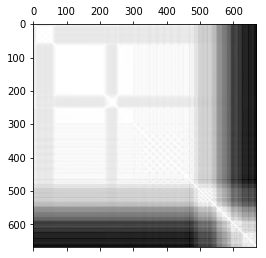

In [130]:
# Display matrix
plt.matshow(dist/dist.max(),cmap=plt.cm.gray_r)

plt.show()